In [41]:
import sys
sys.path.insert(0, '../python')
import cool_tigress as ct

In [42]:
c = ct.CoolTigress()

In [43]:
nH = np.logspace(-3, 4, 300)
T = np.logspace(1, 7, 200)
T2d, nH2d = np.meshgrid(T, nH)
Z = 1.0
xi_CR = 2e-16
dvdr = 9e-14
G_PE = 1.0
G_CI = 1.0
G_CO = 1.0
G_H2 = 0.0

heat = np.empty((nH.size, T.size))
cool = np.empty((nH.size, T.size))
for i, nH_ in enumerate(nH):
    c = ct.CoolTigress(nH_, T, Z, xi_CR, G_PE, G_CI, G_CO, G_H2)
    cool[i,:] = c.get_cooling()
    heat[i,:] = c.get_heating()

Text(0.5, 1.0, 'Heating')

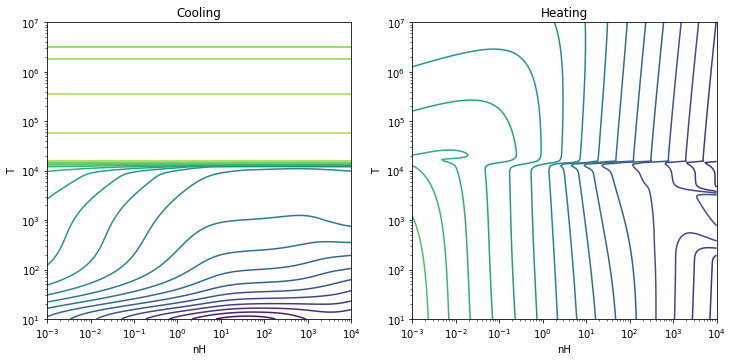

In [44]:
# plt.tricontour(nH2d.flatten(), T2d.flatten(), (heat - cool).flatten(),
#                levels=[-1e-22, -1e-23, 0, 1e-24, 1e-23], linewidths=0.5, colors='k')
plt.figure(figsize=(12, 12))
plt.subplot(221)
im1 = plt.contour(nH2d, T2d, np.log10(cool),
                 levels=np.arange(-30, -20, 0.4))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('nH')
plt.ylabel('T')
plt.title('Cooling')

plt.subplot(222)
im2 = plt.contour(nH2d, T2d, np.log10(heat),
                  levels=np.arange(-30, -20, 0.4))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('nH')
plt.ylabel('T')
plt.title('Heating')

Text(0, 0.5, '$\\Gamma$')

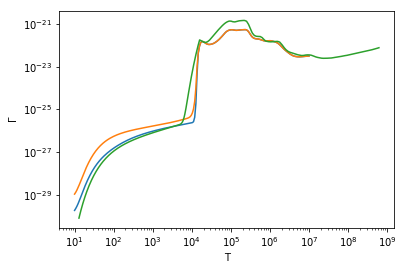

In [47]:
cf = pa.classic.coolftn
TT = cf.get_temp(cf.T1)
idx = np.where(nH > 1e2)[0][0]
plt.loglog(T, cool[idx,:])
idx = np.where(nH > 1e0)[0][0]
plt.loglog(T, cool[idx,:])
plt.loglog(TT, cf.cool)
plt.xlabel('T')
plt.ylabel(r'$\Gamma$')

(1e-27, 1e-24)

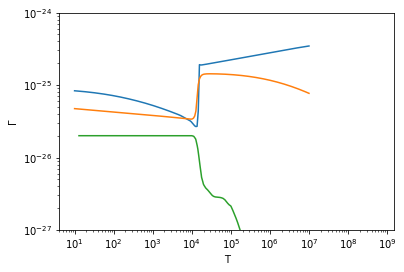

In [49]:
cf = pa.classic.coolftn
idx = np.where(nH > 1e2)[0][0]
plt.loglog(T, heat[idx,:]*1e2)
idx = np.where(nH > 1e0)[0][0]
plt.loglog(T, heat[idx,:]*1e0)
plt.loglog(Told, cf.heat)
plt.xlabel('T')
plt.ylabel(r'$\Gamma$')
plt.ylim(1e-27,1e-24)

In [134]:
%matplotlib widget

In [135]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# X, Y = np.mgrid[-1:1:30j, -1:1:30j]
# Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
X = np.log10(nH2d)
Y = np.log10(T2d)
Z = np.log10(cool)
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1, alpha=0.5)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/jgkim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'lw'
  from ipykernel import kernelapp as app
/Users/jgkim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'lw'
  app.launch_new_instance()


In [115]:
im2.levels

array([-29.1 , -28.95, -28.8 , -28.65, -28.5 , -28.35, -28.2 , -28.05,
       -27.9 , -27.75, -27.6 , -27.45, -27.3 , -27.15, -27.  , -26.85,
       -26.7 , -26.55, -26.4 , -26.25, -26.1 , -25.95, -25.8 , -25.65,
       -25.5 , -25.35, -25.2 , -25.05, -24.9 , -24.75, -24.6 , -24.45,
       -24.3 , -24.15, -24.  , -23.85, -23.7 , -23.55, -23.4 , -23.25,
       -23.1 , -22.95, -22.8 ])

(array([ 3200.,   600.,   400.,   400.,   400.,   800.,  3800.,  4000.,
         1985., 24415.]),
 array([-5.38350745e-22, -4.83222037e-22, -4.28093328e-22, -3.72964620e-22,
        -3.17835912e-22, -2.62707204e-22, -2.07578496e-22, -1.52449787e-22,
        -9.73210790e-23, -4.21923708e-23,  1.29363374e-23]),
 <a list of 10 Patch objects>)

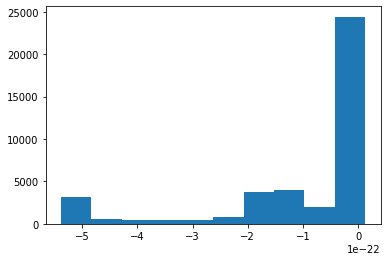

In [78]:
plt.hist((heat - cool).flatten())

In [48]:
c.get_cooling()

array([1.35491706e-27, 1.85123648e-27, 3.48086739e-27, 7.32585739e-27,
       1.38210486e-26, 2.20951301e-26, 3.03905705e-26, 3.70570510e-26,
       4.12234839e-26, 4.28592542e-26, 4.24709479e-26, 4.07531650e-26,
       3.83538672e-26, 3.57709362e-26, 3.33372779e-26, 3.12469720e-26,
       2.95927989e-26, 2.83998989e-26, 2.76507439e-26, 2.73013300e-26,
       2.72920843e-26, 2.75614445e-26, 2.80600283e-26, 2.87838649e-26,
       3.04547729e-26, 5.49301326e-26, 6.89331207e-23, 1.42773120e-22,
       1.09354084e-22, 1.20485859e-22, 1.69827121e-22, 2.89999288e-22,
       4.73233884e-22, 5.29193954e-22, 5.00836117e-22, 5.29674220e-22,
       5.14267947e-22, 2.66301083e-22, 2.00034129e-22, 1.78548570e-22,
       1.60477102e-22, 1.62299788e-22, 1.41881245e-22, 1.00099103e-22,
       5.97009290e-23, 3.95713845e-23, 3.05641782e-23, 2.88562350e-23,
       3.02080558e-23, 3.11270022e-23])

In [41]:
c.get_abundances_fast()

In [44]:
cool = c.get_cooling()
heat = c.get_heating()

(-1e-25, 1e-25)

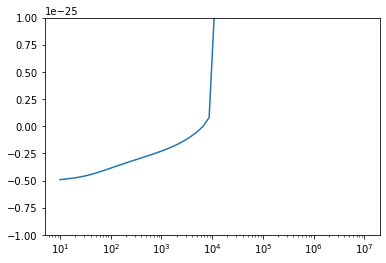

In [45]:
plt.semilogx(c.T, c.cooling - c.heating)
plt.ylim(-1e-25, 1e-25)